In [1]:
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys

In [2]:
# run_path = r"/netfiles/ciroh/floodplainsData/runs/8/run_metadata.json"
run_path = r"/netfiles/ciroh/floodplainsData/runs/9/run_metadata.json"
with open(run_path, 'r') as f:
    run_dict = json.loads(f.read())
out_dir = os.path.join(run_dict['analysis_directory'], 'clustering')

# Load results data
results = pd.read_csv(os.path.join(run_dict['analysis_directory'], 'clustering', 'all_data.csv'))

In [3]:
c1 = '#32d4e6'
c2 = '#faa319'
background_color = '#f0f0f0'

magnitudes = ['Q2', 'Q10', 'Q50', 'Q100']
durations = ['Short', 'Medium', 'Long']
mag_renames = {'Q2': '0.5AEP', 'Q10': '0.1AEP', 'Q50': '0.02AEP', 'Q100': '0.01AEP'}

pt_alpha = 0.5
pt_size = 1
lowess_alpha = 0.95
lowess_lw = 1

In [4]:
subset = ['A', 'B', 'C', 'D', 'E', 'F']
print(len(results))
na_reaches = results[results['Celerity (m/s)'].isna()]['UVM_ID']
print(na_reaches)
# results = results[results['Celerity (m/s)'] < 10]
results = results.dropna(subset=['Celerity (m/s)'])
# results = results[results['cluster'].isin(subset)]
print(len(results))

2545
Series([], Name: UVM_ID, dtype: int64)
2545


2545
Slope vs Celerity | R-squared: 0.7779644383415382 | p-value: 0.0
Slope vs Shape Celerity | R-squared: 0.38481069595685613 | p-value: 1.3520319265523321e-270
1999
Diagnostic size vs Celerity | R-squared: 0.03153001981295478 | p-value: 1.267459267742773e-15
Diagnostic size vs Shape Celerity | R-squared: 0.3465317135231223 | p-value: 9.618233446563412e-187


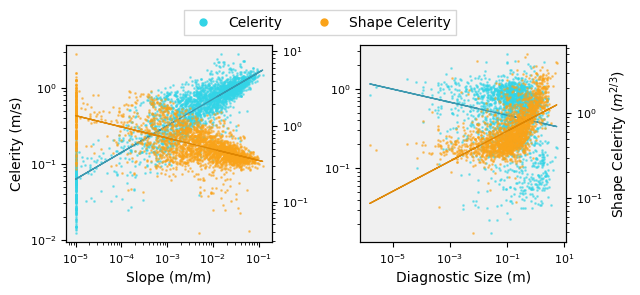

In [5]:
print(len(results))


fig, axs = plt.subplots(ncols=2, figsize=(6.5, 3))
axs[0].scatter(results['Slope'], results['Celerity (m/s)'], c=c1, s=pt_size, alpha=pt_alpha, zorder=1)
twinx0 = axs[0].twinx()
twinx0.scatter(results['Slope'], results['Shape Celerity (m^(2/3))'], c=c2, s=pt_size, alpha=pt_alpha, zorder=2)

# # add lowess
# x = np.log(results['Slope'])
# y = np.log(results['Celerity (m/s)'])
# z = lowess(y, x)
# axs[0].plot(np.exp(z[:, 0]), np.exp(z[:, 1]), c='k', alpha=lowess_alpha, lw=lowess_lw, zorder=3, label='Series Lowess')
# y = np.log(results['Shape Celerity (m^(2/3))'])
# z = lowess(y, x)
# twinx0.plot(np.exp(z[:, 0]), np.exp(z[:, 1]), c='k', alpha=lowess_alpha, lw=lowess_lw, zorder=4)

# add linreg
x = np.log(results['Slope'].to_numpy())
y = np.log(results['Celerity (m/s)'].to_numpy())
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(f'Slope vs Celerity | R-squared: {model.rsquared} | p-value: {model.f_pvalue}')
y_pred = model.predict(x)
axs[0].plot(np.exp(x[:, 1]), np.exp(y_pred), c='#3495ad', alpha=lowess_alpha, lw=lowess_lw, zorder=3, label='Series Lowess')
y = np.log(results['Shape Celerity (m^(2/3))'].to_numpy())
model = sm.OLS(y, x).fit()
print(f'Slope vs Shape Celerity | R-squared: {model.rsquared} | p-value: {model.f_pvalue}')
y_pred = model.predict(x)
twinx0.plot(np.exp(x[:, 1]), np.exp(y_pred), c='#de8500', alpha=lowess_alpha, lw=lowess_lw, zorder=4)

# Label
axs[0].set(xlabel='Slope (m/m)', ylabel='Celerity (m/s)', facecolor=background_color, xscale='log', yscale='log')
twinx0.set(yscale='log')
axs[0].tick_params(labelsize=8)
twinx0.tick_params(labelsize=8)

results = results.dropna(subset=['Diagnostic Size'])
print(len(results))

y2 = 'Diagnostic Size'
axs[1].scatter(results[y2], results['Celerity (m/s)'], c=c1, s=pt_size, alpha=pt_alpha, zorder=1)
twinx1 = axs[1].twinx()
twinx1.scatter(results[y2], results['Shape Celerity (m^(2/3))'], c=c2, s=pt_size, alpha=pt_alpha, zorder=2)
axs[1].set(xlabel='Diagnostic Size (m)', facecolor=background_color, xscale='log', yscale='log')
twinx1.set(yscale='log', ylabel=r'Shape Celerity (${m}^{2/3}$)')
axs[1].tick_params(labelsize=8)
twinx1.tick_params(labelsize=8)

# # add lowess
# x = np.log(results['Ave_Rh'])
# y = np.log(results['Celerity (m/s)'])
# z = lowess(y, x)
# axs[1].plot(np.exp(z[:, 0]), np.exp(z[:, 1]), c='k', alpha=lowess_alpha, lw=lowess_lw, zorder=3)
# y = np.log(results['Shape Celerity (m^(2/3))'])
# z = lowess(y, x)
# twinx1.plot(np.exp(z[:, 0]), np.exp(z[:, 1]), c='k', alpha=lowess_alpha, lw=lowess_lw, zorder=4)

# add linreg
x = np.log(results[y2].to_numpy())
y = np.log(results['Celerity (m/s)'].to_numpy())
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(f'Diagnostic size vs Celerity | R-squared: {model.rsquared} | p-value: {model.f_pvalue}')
y_pred = model.predict(x)
axs[1].plot(np.exp(x[:, 1]), np.exp(y_pred), c='#3495ad', alpha=lowess_alpha, lw=lowess_lw, zorder=3)
y = np.log(results['Shape Celerity (m^(2/3))'].to_numpy())
model = sm.OLS(y, x).fit()
print(f'Diagnostic size vs Shape Celerity | R-squared: {model.rsquared} | p-value: {model.f_pvalue}')
y_pred = model.predict(x)
twinx1.plot(np.exp(x[:, 1]), np.exp(y_pred), c='#de8500', alpha=lowess_alpha, lw=lowess_lw, zorder=4)

# Add custom legend
custom_lines = [plt.Line2D([0], [0], color=c1, lw=0, marker='o', markersize=5),
                plt.Line2D([0], [0], color=c2, lw=0, marker='o', markersize=5)]
fig.legend(custom_lines, ['Celerity', 'Shape Celerity'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.99), fancybox=False)

fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.show()

In [6]:
out_path = os.path.join(run_dict['analysis_directory'], 'clustering', 'final', 'Figure_7.png')
fig.savefig(out_path, dpi=400)

out_path = os.path.join(run_dict['analysis_directory'], 'clustering', 'final', 'Figure_7.pdf')
fig.savefig(out_path, dpi=400)